In [306]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from matplotlib.pyplot import xticks

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [307]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [308]:
df_lead=pd.read_csv('Leads.csv')
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [309]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [310]:
df_lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [311]:
round((df_lead.isnull().sum()/len(df_lead.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [312]:
df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [313]:
# Replacing 'select' value with NaN in the columns, 
# becasue select indicates that the prospect didnot choose any option while filling
df_lead = df_lead.replace('Select',np.nan)
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [314]:
# Drop columns with more than 45% Null values
# columns - Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score ,Asymmetrique Profile Score,Lead Profile, Lead Quality, How did you hear about X Education

df_lead=df_lead.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score' ,'Asymmetrique Profile Score','Lead Profile', 'Lead Quality', 'How did you hear about X Education'],axis=1)


In [315]:
df_lead.shape

(9240, 30)

In [316]:
round((df_lead.isnull().sum()/len(df_lead.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

- Leds continue with column wise analysis for removing Nan values

**Country**

In [317]:
# country
df_lead.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Canada                     4
Germany                    4
Sweden                     3
China                      2
Philippines                2
Asia/Pacific Region        2
Ghana                      2
Belgium                    2
Italy                      2
Bangladesh                 2
Netherlands                2
Uganda                     2
Tanzania                   1
Indonesia                  1
Vietnam                    1
Sri Lanka                  1
Kenya                      1
Malaysia                   1
Denmark       

In [318]:
# Most of the values are for India, we cannot impute India as it becomes biased. Lets impute with 'unknown'
df_lead['Country']=df_lead['Country'].replace(np.nan,'unknown')
df_lead['Country'].isnull().sum()

0

**Specialization**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

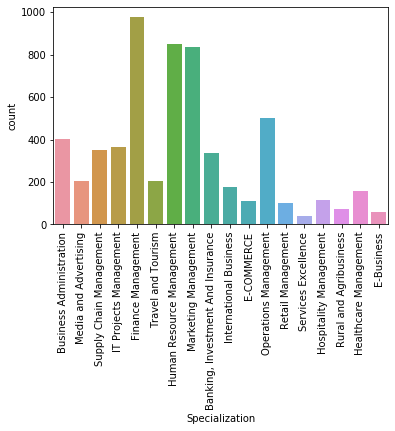

In [319]:
# Specialization
sns.countplot(df_lead.Specialization)
xticks(rotation=90)

In [320]:
# Propects would not have entered any Specialization, hence replace with a new Specialization as 'Others'
df_lead['Specialization']= df_lead['Specialization'].replace(np.nan,'Others')
df_lead['Specialization'].isnull().sum()

0

**What is your current occupation**

In [321]:
df_lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [322]:
# Majority of the values are unemployed, but we also have Other category in the list, so lets impute this with 'Other'
df_lead['What is your current occupation']= df_lead['What is your current occupation'].replace(np.nan,'Other')
df_lead['What is your current occupation'].isnull().sum()

0

**What matters most to you in choosing a course**

In [323]:
df_lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [324]:
# Almost all the values are for same value 'Better Career Prospects', no inference can be made, so lets drop the column
df_lead=df_lead.drop(['What matters most to you in choosing a course'],axis=1)
df_lead.shape

(9240, 29)

**Tags**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

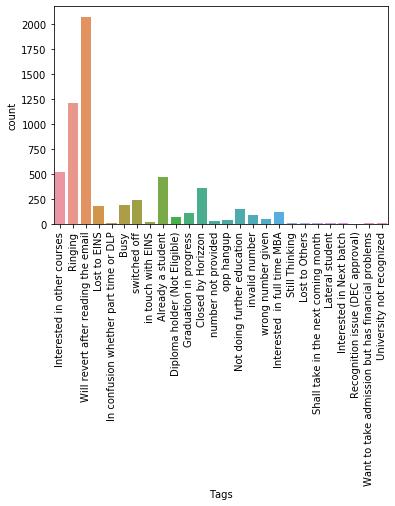

In [325]:
sns.countplot(df_lead['Tags'])
xticks(rotation=90)

In [326]:
df_lead.Tags.unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

- Looks like Tags is a column generated by the sales team after getting in touch with the Lead. Since our need is to predict the lead, hence we can remove the column from the dataframe

In [327]:
df_lead.drop('Tags',axis=1,inplace=True)

**City**

In [328]:
df_lead['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [329]:
# imputing missing values with Other Cities
df_lead['City']=df_lead['City'].replace(np.nan,'Other Cities')
df_lead['City'].isnull().sum()

0

In [330]:
# remaining missing values in columns
round((df_lead.isnull().sum()/len(df_lead.index))*100,2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendati

In [331]:
# remaining columsn are all with less than 2%, lets drop these rows
df_lead.dropna(inplace=True)

In [332]:
round((df_lead.isnull().sum()/len(df_lead.index))*100,2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

- We can see that no more missing values are present in the data set, hence we can proceed with EDA

In [333]:
# Also, converting a bunch of columns with only 'Yes' and 'No' values to binary
varlist=['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes':1,'No':0})
df_lead[varlist]= df_lead[varlist].apply(binary_map)

## Exploratory Data Analysis

In [334]:
# checking lead conversion rate
conversion_rate = (sum(df_lead['Converted'])/len(df_lead.index))*100
conversion_rate

37.85541106458012

- We have 38% conversion rate

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

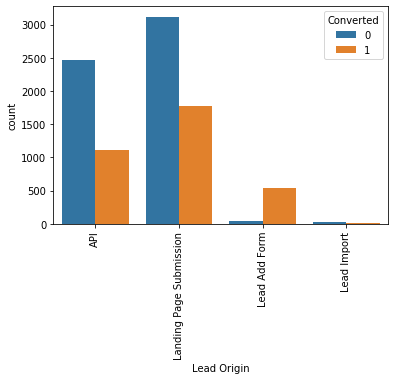

In [335]:
# cheking the origin of leads
sns.countplot(df_lead['Lead Origin'],hue=df_lead['Converted'])
xticks(rotation=90)

- We can see that API and Landing Page Submission has around 40% conversion rates, where as Lead Add form has 90% conversion rates

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

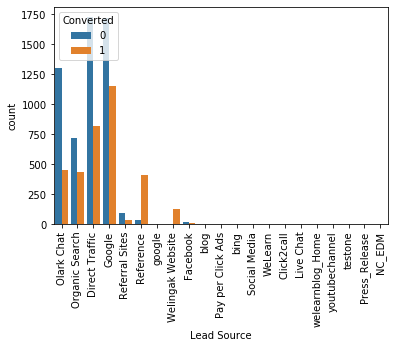

In [336]:
# cheking the source of leads
sns.countplot(df_lead['Lead Source'],hue=df_lead['Converted'])
xticks(rotation=90)

- We can see that google and Google are repetetive, we can replace google with Google
- Also, there are so many small contributers, this will result in too many dummy variables, instead we can club them as Others

In [337]:
# imputing the values
df_lead['Lead Source'] =df_lead['Lead Source'].replace('google','Google')
df_lead['Lead Source'] =df_lead['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home', 'youtubechannel','testone','Press_Release','NC_EDM'],'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

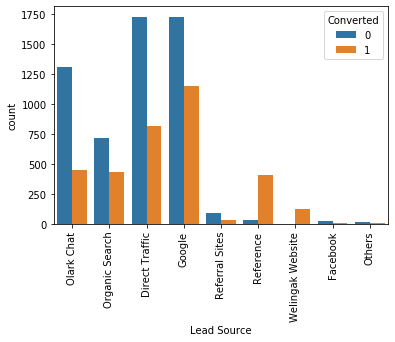

In [338]:
sns.countplot(df_lead['Lead Source'],hue=df_lead['Converted'])
xticks(rotation=90)

- We can infer that Google and Direct Traffic has most Leads
- But, Google has high conversions.

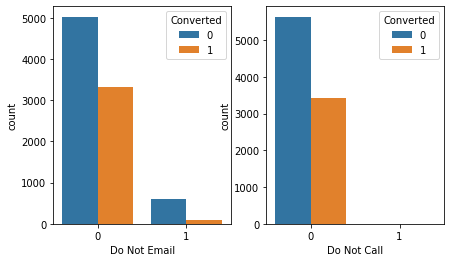

In [339]:
# Checking for Do Not Email & Do Not Call
plt.figure(figsize=[7,4])
plt.subplot(1,2,1)
sns.countplot(df_lead['Do Not Email'],hue=df_lead['Converted'])

plt.subplot(1,2,2)
sns.countplot(df_lead['Do Not Call'],hue=df_lead['Converted'])

- From the above charts, we can infer that
- People who did not ask for Do Not Email and Do Not Call has high conversion rate

Also, since this column has only two values, we can convert this to binary column

### Data Preparation

In [340]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
Prospect ID                                 9074 non-null object
Lead Number                                 9074 non-null int64
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null int64
Do Not Call                                 9074 non-null int64
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
Country                                     9074 non-null object
Specialization                              9074 non-null object
What is your current occupation             9074 no

In [341]:
# Creating dummies for the below Categorical columns with no imputed values and dropping the first one
dummy1= pd.get_dummies(df_lead[['Lead Origin','Lead Source','Last Activity','Specialization','Last Notable Activity']],drop_first=True)

# Adding it to original data set
df_lead= pd.concat([df_lead,dummy1],axis=1)
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,1,0,0,0,0,0,0,0


In [342]:
# Creating dummies for other categorical columns
Country1 = pd.get_dummies(df_lead['Country'],prefix='Country')
# Dropping the column without any country
Country2 = Country1.drop(['Country_unknown'],1)
df_lead= pd.concat([df_lead,Country2],axis=1)

# Creating dummies for City
City1 = pd.get_dummies(df_lead['City'],prefix='City')
City2 = City1.drop(['City_Other Cities'],1)
# Adding the results to the actual dataframe
df_lead= pd.concat([df_lead,City2],axis=1)

# Creating dummies for What is your current occupation
Occupation1 = pd.get_dummies(df_lead['What is your current occupation'],prefix='Occupation')
Occupation2 = Occupation1.drop(['Occupation_Other'],1)
# Adding the results to the actual dataframe
df_lead= pd.concat([df_lead,Occupation2],axis=1)


In [343]:
# Dropping the repeated columns
df_lead=df_lead.drop(['Lead Origin','Lead Source','Last Activity','Specialization','Last Notable Activity','Country','City','What is your current occupation'],1)
df_lead.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Occupation_Businessman,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,1,0,0,0,0,0,0,0,1,0


### Test Train Split

In [344]:
# Putting Feature variable to X
X=df_lead.drop(['Prospect ID','Lead Number','Converted'],axis=1)

# Putting Responce variable to Y
y=df_lead['Converted']

In [345]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

## Feature Scaling

In [346]:
scaler= StandardScaler()

# TotalVisits, Total Time Spent on Website, Page Views Per Visit
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Occupation_Businessman,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
3009,0,0,-0.284595,-0.160255,-0.179666,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.179666,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4750,0,0,-0.284595,1.643304,-0.179666,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7987,0,0,0.295588,2.017593,0.058552,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


## Model Building

### Feature Seleciton using RFE

In [347]:
# instantiating Logistic Regression
logreg= LogisticRegression()

#Applying RFE 
rfe= RFE(logreg,15)
rfe.fit(X_train,y_train)

# displaying the slected columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable', 'Occupation_Housewife',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional'],
      dtype='object')

In [348]:
X_train_rfe = sm.add_constant(X_train[col])

logm1 = sm.GLM(y_train,X_train_rfe,family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.0
Date:                Sun, 19 Apr 2020   Deviance:                       5188.1
Time:                        10:56:01   Pearson chi2:                 6.23e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.1954      0.107    -20.470      0.000      -2.406      -1.985
Do Not Email                                      -1.5984      0.173     -9.263      0.000      -1.937      -1.260
Total Time Spent on Website                        1.1410      0.041     28.067      0.000       1.061       1.221
Lead Origin_Landing Page Submission               -0.3335      0.088     -3.770      0.000      -0.507      -0.160
Lead Origin_Lead Add Form                          3.4129      0.230     14.840      0.000       2.962       3.864
Lead Source_Olark Chat                             1.2531      0.122     10.313      0.000       1.015       1.491
Lead Source_Welingak Website                       1.9815      0.752      2.636      0.008       0.508       3.455
Last Activity_Had a Phone Conversation             1.2248      1.162      1.054      0.292      -1.052       3.501
Last Activity_Olark Chat Conversation             -1.3608      0.165     -8.258      0.000      -1.684      -1.038
Last Activity_SMS Sent                             1.3219      0.075     17.627      0.000       1.175       1.469
Last Notable Activity_Had a Phone Conversation     2.4639      1.613      1.528      0.127      -0.697       5.625
Last Notable Activity_Unreachable                  2.1000      0.492      4.269      0.000       1.136       3.064
Occupation_Housewife                              24.0991   1.56e+04      0.002      0.999   -3.06e+04    3.07e+04
Occupation_Student                                 1.4128      0.228      6.194      0.000       0.966       1.860
Occupation_Unemployed                              1.2666      0.088     14.426      0.000       1.095       1.439
Occupation_Working Professional                    3.7475      0.198     18.969      0.000       3.360       4.135
==================================================================================================================
"""

In [349]:
# removing Occupation_Housewife with high p- value

col1 = col.drop('Occupation_Housewife',1)

X_train_rfe = sm.add_constant(X_train[col1])

logm2 = sm.GLM(y_train,X_train_rfe,family=sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2602.8
Date:                Sun, 19 Apr 2020   Deviance:                       5205.5
Time:                        10:56:01   Pearson chi2:                 6.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.1674      0.106    -20.362      0.000      -2.376      -1.959
Do Not Email                                      -1.6032      0.173     -9.292      0.000      -1.941      -1.265
Total Time Spent on Website                        1.1402      0.041     28.109      0.000       1.061       1.220
Lead Origin_Landing Page Submission               -0.3298      0.088     -3.736      0.000      -0.503      -0.157
Lead Origin_Lead Add Form                          3.4712      0.230     15.071      0.000       3.020       3.923
Lead Source_Olark Chat                             1.2473      0.121     10.285      0.000       1.010       1.485
Lead Source_Welingak Website                       1.9263      0.752      2.562      0.010       0.452       3.400
Last Activity_Had a Phone Conversation             1.2237      1.162      1.054      0.292      -1.053       3.500
Last Activity_Olark Chat Conversation             -1.3669      0.165     -8.301      0.000      -1.690      -1.044
Last Activity_SMS Sent                             1.3128      0.075     17.533      0.000       1.166       1.460
Last Notable Activity_Had a Phone Conversation     2.4532      1.612      1.522      0.128      -0.706       5.613
Last Notable Activity_Unreachable                  2.0851      0.491      4.245      0.000       1.122       3.048
Occupation_Student                                 1.3836      0.228      6.070      0.000       0.937       1.830
Occupation_Unemployed                              1.2395      0.087     14.243      0.000       1.069       1.410
Occupation_Working Professional                    3.7183      0.197     18.857      0.000       3.332       4.105
==================================================================================================================
"""

In [350]:

# removing Last Activity_Had a Phone Conversation with high p- value

col2 = col1.drop('Last Activity_Had a Phone Conversation',1)

X_train_rfe = sm.add_constant(X_train[col2])

logm3 = sm.GLM(y_train,X_train_rfe,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.4
Date:                Sun, 19 Apr 2020   Deviance:                       5206.7
Time:                        10:56:01   Pearson chi2:                 6.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.1641      0.106    -20.347      0.000      -2.373      -1.956
Do Not Email                                      -1.6024      0.173     -9.285      0.000      -1.941      -1.264
Total Time Spent on Website                        1.1405      0.041     28.122      0.000       1.061       1.220
Lead Origin_Landing Page Submission               -0.3332      0.088     -3.777      0.000      -0.506      -0.160
Lead Origin_Lead Add Form                          3.4673      0.230     15.058      0.000       3.016       3.919
Lead Source_Olark Chat                             1.2440      0.121     10.265      0.000       1.006       1.482
Lead Source_Welingak Website                       1.9262      0.752      2.562      0.010       0.452       3.400
Last Activity_Olark Chat Conversation             -1.3689      0.165     -8.313      0.000      -1.692      -1.046
Last Activity_SMS Sent                             1.3109      0.075     17.514      0.000       1.164       1.458
Last Notable Activity_Had a Phone Conversation     3.6753      1.120      3.283      0.001       1.481       5.870
Last Notable Activity_Unreachable                  2.0834      0.491      4.241      0.000       1.120       3.046
Occupation_Student                                 1.3837      0.228      6.071      0.000       0.937       1.830
Occupation_Unemployed                              1.2411      0.087     14.265      0.000       1.071       1.412
Occupation_Working Professional                    3.7183      0.197     18.857      0.000       3.332       4.105
==================================================================================================================
"""

In [351]:
# LEts check for Correlation using VIF
vif = pd.DataFrame()
X = X_train[col2]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Occupation_Unemployed,2.32
2,Lead Origin_Landing Page Submission,2.16
3,Lead Origin_Lead Add Form,1.75
4,Lead Source_Olark Chat,1.72
7,Last Activity_SMS Sent,1.55
6,Last Activity_Olark Chat Conversation,1.36
5,Lead Source_Welingak Website,1.33
1,Total Time Spent on Website,1.31
12,Occupation_Working Professional,1.31
0,Do Not Email,1.10


In [352]:
X_train_rfe.shape

(6351, 14)

**We have the model now, lets predict the target varaible and generate Probabilities as Lead scores**

In [353]:
# Predict the probabilities
y_train_pred = res.predict(X_train_rfe).values.reshape(-1)
y_train_pred[:10]

array([0.06416086, 0.26945425, 0.64985587, 0.6654781 , 0.91339556,
       0.75031381, 0.02924336, 0.92819218, 0.86638985, 0.89786882])

In [354]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Lead_score':y_train_pred})
y_train_pred_final['LeadID'] = X_train.index
y_train_pred_final.head()

,Converted,Lead_score,LeadID
0,0,0.064161,3009
1,0,0.269454,1012
2,0,0.649856,9226
3,1,0.665478,4750
4,1,0.913396,7987


**Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0**

In [355]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_score.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Lead_score,LeadID,predicted
0,0,0.064161,3009,0
1,0,0.269454,1012,0
2,0,0.649856,9226,1
3,1,0.665478,4750,1
4,1,0.913396,7987,1


In [356]:
# Confusing Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[3459  446]
 [ 752 1694]]


In [357]:
# LEts Check Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.8113682884585105


**Metrics beyond Accuracy**

In [358]:
TN=confusion[0,0] # True Negative
TP=confusion[1,1] # True Positive
FN=confusion[1,0] # False Negative
FP=confusion[0,1] # False Positive

In [359]:
# Lets see sensitivity of the model
sensitivity = TP/float(TP+FN)
sensitivity

0.6925592804578904

In [360]:
# Let us calculate specificity
speceficity = TN / float(TN+FP)
speceficity 

0.885787451984635

### Plotting ROC curve

In [361]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

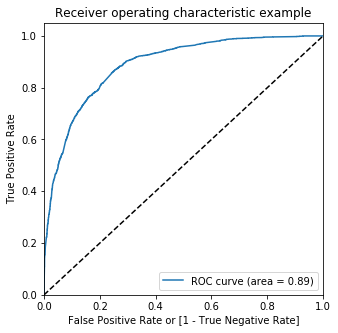

In [362]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_score)

### Getting Optimal cutoff

In [363]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_score.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_score,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.064161,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.269454,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.649856,9226,1,1,1,1,1,1,1,1,0,0,0
3,1,0.665478,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.913396,7987,1,1,1,1,1,1,1,1,1,1,1


In [364]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.592348  0.986917  0.345198
0.2   0.2  0.767438  0.914554  0.675288
0.3   0.3  0.790742  0.873671  0.738796
0.4   0.4  0.811683  0.762878  0.842254
0.5   0.5  0.811368  0.692559  0.885787
0.6   0.6  0.803496  0.630417  0.911908
0.7   0.7  0.780350  0.515536  0.946223
0.8   0.8  0.758936  0.422731  0.969526
0.9   0.9  0.711069  0.269828  0.987452


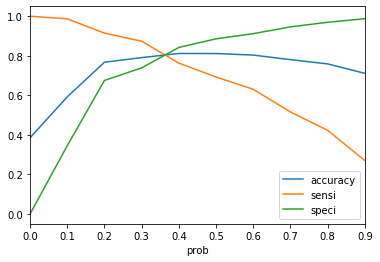

In [365]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the above plot we can see that the optimal point is 0.4. Hence lets change the cutoff to 0.4 and recalculate the metrics 
### Regerating the probabilities using 0.4 as cutoff

In [366]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_score.map(lambda x: 1 if x > 0.4 else 0)

# Recalculate Confusing Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)


TN=confusion[0,0] # True Negative
TP=confusion[1,1] # True Positive
FN=confusion[1,0] # False Negative
FP=confusion[0,1] # False Positive
confusion

array([[3289,  616],
       [ 580, 1866]], dtype=int64)

In [367]:
# LEts Check Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

# Lets see sensitivity of the model
sensitivity = TP/float(TP+FN)
print('Sensitivity:', sensitivity )

# Let us calculate specificity
speceficity = TN / float(TN+FP)
print('Speceficity:', speceficity )

0.8116831994961423
Sensitivity: 0.7628781684382666
Speceficity: 0.8422535211267606


**ROC Curve**

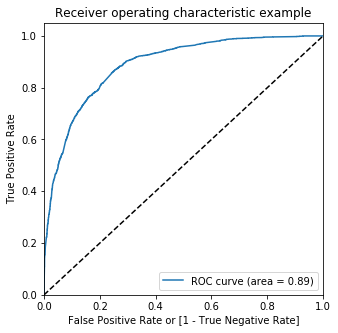

In [368]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_score)

### Precision and Recall


In [369]:
precision= TP/float(TP+FP)
precision

0.7518130539887188

In [370]:
recall = TP/float(TP+FN)
recall

0.7628781684382666

**We have very decent model with good parameters, lets predict the values on Test data**

In [371]:
# Scaling the test data
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
# Selecting the required columns
X_test = X_test[col2]
X_test.shape

(2723, 13)

In [372]:
# Add constant
X_test_sm = sm.add_constant(X_test)

# predict the values
y_test_pred = res.predict(X_test_sm).values.reshape(-1)
y_test_pred[:10]

array([0.054728  , 0.96686603, 0.04640734, 0.84202489, 0.04040278,
       0.59061379, 0.33428994, 0.30100032, 0.94488626, 0.34916122])

In [373]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values,'Lead_score':y_test_pred})
y_test_pred_final['LeadID'] = X_test.index
y_test_pred_final.head()

,Converted,Lead_score,LeadID
0,0,0.054728,3271
1,1,0.966866,1490
2,0,0.046407,7936
3,1,0.842025,4216
4,0,0.040403,3830


In [374]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Lead_score.map(lambda x: 1 if x > 0.4 else 0)

In [375]:
y_test_pred_final.head()

,Converted,Lead_score,LeadID,final_predicted
0,0,0.054728,3271,0
1,1,0.966866,1490,1
2,0,0.046407,7936,0
3,1,0.842025,4216,1
4,0,0.040403,3830,0


In [376]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.8189496878442893

In [377]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion2

array([[1474,  260],
       [ 233,  756]], dtype=int64)

In [378]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [379]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7644084934277048

In [380]:
# Let us calculate specificity
TN / float(TN+FP)

0.8500576701268743